In [1]:
import pymysql
import pandas as pd
import random
from datetime import datetime, timedelta

In [2]:
# MySQL 연결 정보
DB_HOST = "localhost"  
DB_USER = "root"       
DB_PASSWORD = "1234"
DB_NAME = "performance_db"

In [3]:
# MySQL 연결
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
cursor = conn.cursor()

In [4]:
def generate_random_data(num_rows):
    data = []
    for _ in range(num_rows):
        measure_date = datetime.today() - timedelta(days=random.randint(0,365))
        birth_date = datetime.today() - timedelta(days=random.randint(18*365,35*365))
        gender = random.choice(['남','여'])
        name = f"선수{random.randint(1,1000)}"
        team = f"팀{random.randint(1,10)}"
        location = random.choice(['송파','화성'])
        position = random.choice(["FW", "MF", "DF", "GK"])
        dominant_foot = random.choice(["Right", "Left", "Both"])
        height_cm = round(random.uniform(160, 200), 1)
        weight_kg = round(random.uniform(60, 100), 1)
        body_fat_percent = round(random.uniform(7, 25), 1)
        muscle_mass_kg = round(random.uniform(40, 80), 1)
        deadlift_kg = round(random.uniform(80, 200), 1)
        squat_strength_n = round(random.uniform(800, 2000), 1)
        squat_power_w = round(random.uniform(1000, 3000), 1)
        eccentric_left_n = round(random.uniform(500, 1500), 1)
        eccentric_right_n = round(random.uniform(500, 1500), 1)
        isometric_left_n = round(random.uniform(700, 1700), 1)
        isometric_right_n = round(random.uniform(700, 1700), 1)
        hip_abd_left_n = round(random.uniform(200, 600), 1)
        hip_abd_right_n = round(random.uniform(200, 600), 1)
        hip_add_left_n = round(random.uniform(200, 600), 1)
        hip_add_right_n = round(random.uniform(200, 600), 1)
        hip_flexion_left_n = round(random.uniform(200, 600), 1)
        hip_flexion_right_n = round(random.uniform(200, 600), 1)
        ysr = round(random.uniform(0.5, 3.0), 2)
        reactive_time = random.randint(200, 500)  # 밀리초 단위
        cmj_left = round(random.uniform(30, 70), 1)
        cmj_right = round(random.uniform(30, 70), 1)
        cmj_both = round(random.uniform(35, 75), 1)
        data.append((measure_date, birth_date, gender, name, team, location, position, dominant_foot,
                     height_cm, weight_kg, body_fat_percent, muscle_mass_kg, deadlift_kg, squat_strength_n, squat_power_w,
                     eccentric_left_n, eccentric_right_n, isometric_left_n, isometric_right_n,
                     hip_abd_left_n, hip_abd_right_n, hip_add_left_n, hip_add_right_n,
                     hip_flexion_left_n, hip_flexion_right_n, ysr, reactive_time, cmj_left, cmj_right, cmj_both))

    return data

In [5]:
# 데이터 삽입 SQL
insert_sql = """
INSERT INTO performance_data (measure_date, birth_date, gender, name, team, location, position, dominant_foot,
    height_cm, weight_kg, body_fat_percent, muscle_mass_kg, deadlift_kg, squat_strength_n, squat_power_w,
    eccentric_left_n, eccentric_right_n, isometric_left_n, isometric_right_n,
    hip_abd_left_n, hip_abd_right_n, hip_add_left_n, hip_add_right_n,
    hip_flexion_left_n, hip_flexion_right_n, ysr, reactive_time, cmj_left, cmj_right, cmj_both)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

In [6]:
# 랜덤 데이터 삽입
random_data = generate_random_data(50)  # 50개 데이터 생성
cursor.executemany(insert_sql, random_data)
conn.commit()

In [7]:
cursor.close()
conn.close()

In [8]:
# MySQL에서 데이터 불러오기
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
select_query = "SELECT * FROM performance_data"
df = pd.read_sql(select_query, conn)
conn.close()


df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_25212\1939251444.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(select_query, conn)


,id,measure_date,birth_date,gender,name,team,location,position,dominant_foot,height_cm,...,hip_abd_right_n,hip_add_left_n,hip_add_right_n,hip_flexion_left_n,hip_flexion_right_n,ysr,reactive_time,cmj_left,cmj_right,cmj_both
0,1,2024-10-19,1994-02-12,남,선수478,팀10,송파,MF,Right,188.3,...,570.4,227.8,448.6,557.2,542.6,0.79,432,30.0,56.6,35.1
1,2,2024-07-21,2003-04-05,남,선수7,팀6,송파,GK,Left,165.0,...,309.3,581.6,446.2,549.8,213.3,1.72,261,62.7,33.3,54.9
2,3,2024-08-23,2006-01-18,여,선수149,팀1,송파,MF,Right,180.7,...,322.5,546.5,370.3,521.6,341.8,1.08,363,69.6,65.0,63.2
3,4,2024-06-04,1995-06-15,여,선수126,팀1,화성,MF,Both,167.3,...,575.4,314.8,327.2,317.0,360.4,1.34,211,67.7,42.3,71.2
4,5,2024-05-30,1991-11-22,남,선수839,팀7,송파,DF,Both,185.8,...,202.8,517.1,575.4,217.9,345.9,1.01,233,39.1,38.5,47.9


In [9]:
# 기초 통계 정보 확인
df.describe()

,id,height_cm,weight_kg,body_fat_percent,muscle_mass_kg,deadlift_kg,squat_strength_n,squat_power_w,eccentric_left_n,eccentric_right_n,...,hip_abd_right_n,hip_add_left_n,hip_add_right_n,hip_flexion_left_n,hip_flexion_right_n,ysr,reactive_time,cmj_left,cmj_right,cmj_both
count,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,180.830000,81.31700,16.55900,60.691000,139.208000,1371.900000,2024.586000,999.441000,955.072000,...,403.944000,407.882000,423.187000,407.57800,406.958000,1.633700,339.100000,49.106000,48.272000,56.270000
std,29.011492,11.858778,11.65694,5.30504,12.084301,35.644285,347.641136,536.108365,285.844159,289.021081,...,105.729014,109.027841,113.174883,126.87625,125.969854,0.710968,86.021198,11.581262,12.062255,11.213867
min,1.000000,160.800000,60.30000,7.20000,40.000000,80.100000,809.100000,1008.900000,509.600000,523.300000,...,200.100000,206.300000,205.800000,201.40000,201.000000,0.570000,206.000000,30.000000,30.100000,35.100000
25%,25.750000,169.850000,70.95000,11.62500,49.075000,108.150000,1076.675000,1582.000000,744.050000,692.525000,...,319.275000,333.000000,328.625000,293.02500,304.300000,0.997500,266.250000,40.000000,38.450000,47.675000
50%,50.500000,181.000000,82.40000,16.75000,61.450000,142.800000,1331.800000,2087.500000,963.550000,909.650000,...,397.700000,411.400000,428.950000,403.70000,389.300000,1.640000,330.000000,50.100000,43.550000,55.850000
75%,75.250000,190.775000,91.50000,21.42500,70.625000,173.325000,1695.825000,2463.625000,1269.800000,1222.150000,...,495.800000,500.275000,525.825000,521.52500,534.625000,2.235000,408.000000,58.725000,60.250000,64.825000
max,100.000000,199.900000,99.80000,25.00000,79.700000,200.000000,1999.400000,2973.300000,1487.800000,1464.000000,...,597.800000,597.600000,598.900000,600.00000,599.600000,2.940000,494.000000,69.600000,69.300000,74.800000


In [10]:
df.groupby("gender")[["height_cm", "weight_kg"]].mean()

,height_cm,weight_kg
gender,,
남,180.738776,80.567347
여,180.917647,82.037255


In [11]:
df.groupby("position")[["squat_power_w"]].mean().sort_values(by="squat_power_w", ascending=False)

,squat_power_w
position,
FW,2149.741667
MF,2049.011538
GK,1968.240000
DF,1935.380000


In [12]:
df.groupby("dominant_foot")[["cmj_left", "cmj_right", "cmj_both"]].mean()

,cmj_left,cmj_right,cmj_both
dominant_foot,,,
Both,47.041026,47.271795,57.725641
Left,48.770000,47.586667,54.516667
Right,52.029032,50.193548,56.135484


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: "Malgun Gothic" - Windows)
plt.rcParams["font.family"] = "Malgun Gothic"

# 한글 깨짐 방지 (음수 부호 깨짐 방지)
plt.rcParams["axes.unicode_minus"] = False

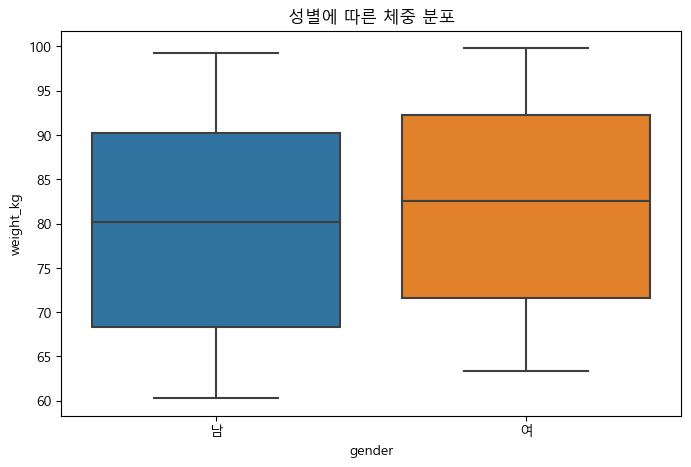

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="gender", y="weight_kg", data=df)
plt.title("성별에 따른 체중 분포")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_25212\2764660196.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="position", y="squat_power_w", data=df, ci=None)


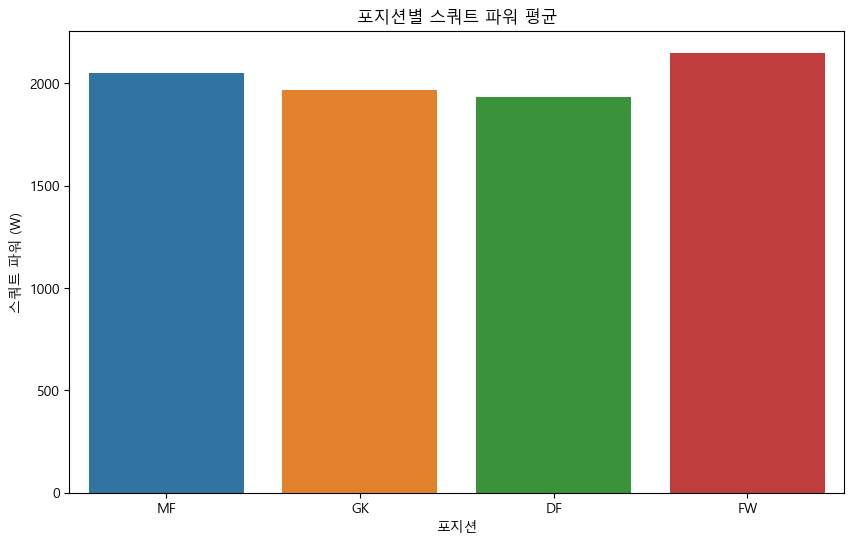

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="position", y="squat_power_w", data=df, ci=None)
plt.title("포지션별 스쿼트 파워 평균")
plt.xlabel("포지션")
plt.ylabel("스쿼트 파워 (W)")
plt.show()